In [2]:
import pandas as pd
import numpy as np

In [16]:
data=pd.read_csv("datasets/Cleavland.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


<Axes: >

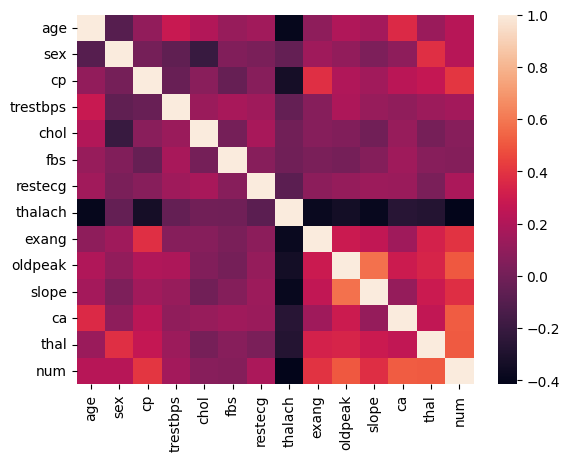

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
data=data[data!='?']
sns.heatmap(data.corr())

In [5]:
##data transformation
data["ca"]=data["ca"].astype(float)
data["ca"].fillna(data["ca"].mean())

0      0.000000
1      3.000000
2      2.000000
3      0.000000
4      0.000000
         ...   
298    0.000000
299    2.000000
300    1.000000
301    1.000000
302    0.672241
Name: ca, Length: 303, dtype: float64

In [6]:
data["thal"]=data["thal"].astype(float)
data["thal"].fillna(data["thal"].mean())

0      6.0
1      3.0
2      7.0
3      3.0
4      3.0
      ... 
298    7.0
299    7.0
300    7.0
301    3.0
302    3.0
Name: thal, Length: 303, dtype: float64

In [7]:
z_score=(data-data.mean())/data.std()
z_score

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.947160,0.685069,-2.248056,0.756274,-0.264463,2.390484,1.015005,0.017169,-0.69548,1.085542,2.270822,-0.717104,0.652563,-0.762936
1,1.389703,0.685069,0.876535,1.608559,0.759159,-0.416945,1.015005,-1.818896,1.43311,0.396526,0.648041,2.483107,-0.894063,0.865019
2,1.389703,0.685069,0.876535,-0.664201,-0.341717,-0.416945,1.015005,-0.900864,1.43311,1.343924,0.648041,1.416370,1.168105,0.051041
3,-1.929372,0.685069,-0.164995,-0.096011,0.063869,-0.416945,-0.995103,1.634655,-0.69548,2.119067,2.270822,-0.717104,-0.894063,-0.762936
4,-1.486829,-1.454889,-1.206525,-0.096011,-0.824558,-0.416945,1.015005,0.978917,-0.69548,0.310399,-0.974740,-0.717104,-0.894063,-0.762936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,-1.044285,0.685069,-2.248056,-1.232391,0.334260,-0.416945,-0.995103,-0.769716,-0.69548,0.138144,0.648041,-0.717104,1.168105,0.051041
299,1.500339,0.685069,0.876535,0.699455,-1.037008,2.390484,-0.995103,-0.376274,-0.69548,2.032940,0.648041,1.416370,1.168105,0.865019
300,0.283345,0.685069,0.876535,-0.096011,-2.234453,-0.416945,-0.995103,-1.512885,1.43311,0.138144,0.648041,0.349633,1.168105,1.678996
301,0.283345,-1.454889,-1.206525,-0.096011,-0.206522,-0.416945,1.015005,1.066349,-0.69548,-0.895381,0.648041,0.349633,-0.894063,0.051041


In [8]:
data=data[(z_score<=3).all(axis=1)]
data=data[(z_score>=-3).all(axis=1)]

C:\Users\Sanket Kittad\AppData\Local\Temp\ipykernel_21464\4193310006.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=data[(z_score>=-3).all(axis=1)]


In [9]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,1
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

x=data.drop("num",axis=1)
y=data["num"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)


In [11]:
reg=LogisticRegression(max_iter=3000)
reg.fit(x_train,y_train)

C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=3000)

In [12]:
y_pred=reg.predict(x_test)
y_pred
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.4482758620689655

In [13]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [14]:
y_pred=knn.predict(x_test)
y_pred


array([0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [15]:
len(x_test)

29